Kaggle data source - https://www.kaggle.com/datasets/therohk/india-headlines-news-dataset

Tfidf logic code reference - https://sci2lab.github.io/ml_tutorial/tfidf/#show_similar_documents

In [2]:
import os
import re
import time
import pandas as pd
import numpy as np
import datetime
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.metrics import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt

from search_functions import *

In [3]:
FILE_PATH = os.path.join('C:\\Users\\Hariharan\\Desktop\\ML Projects','Search using tfidf','data','india-news-headlines.csv')
print(FILE_PATH)

C:\Users\Hariharan\Desktop\ML Projects\Search using tfidf\data\india-news-headlines.csv


In [4]:
print('Reading the Questions file...')
df = pd.read_csv(FILE_PATH, delimiter=',', encoding='ISO-8859-1')
print('done')
print(df.shape)

Reading the Questions file...
done
(3424067, 3)


In [5]:
print(df.columns)

Index(['publish_date', 'headline_category', 'headline_text'], dtype='object')


In [6]:
df.drop(columns=['headline_category'],inplace=True)

In [7]:
df['publish_date'] = df['publish_date'].astype(str)
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d')
df['year'] = pd.DatetimeIndex(df['publish_date']).year
df['month'] = pd.DatetimeIndex(df['publish_date']).month
df['day'] = pd.DatetimeIndex(df['publish_date']).day

In [8]:
data = [preprocess(raw_text) for raw_text in (df['headline_text'])]

df['clean_text'] = data

In [9]:
df.head()

,publish_date,headline_text,year,month,day,clean_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,2001,1,2,status quo will not be disturbed at ayodhya sa...
1,2001-01-02,Fissures in Hurriyat over Pak visit,2001,1,2,fissures in hurriyat over pak visit
2,2001-01-02,America's unwanted heading for India?,2001,1,2,america s unwanted heading for india
3,2001-01-02,For bigwigs; it is destination Goa,2001,1,2,for bigwigs it is destination goa
4,2001-01-02,Extra buses to clear tourist traffic,2001,1,2,extra buses to clear tourist traffic


In [10]:
%%time 
tfidf_filename = os.path.join('C:\\Users\\Hariharan\\Desktop\\ML Projects','Search using tfidf','model','tfidf.pk')
tfidf_features_filename = os.path.join('C:\\Users\\Hariharan\\Desktop\\ML Projects','Search using tfidf','model','tfidf_features.pk')

tfidf,tfidf_features = refresh_tf_idf_model(df,tfidf_filename,tfidf_features_filename)

Wall time: 1min 25s


In [28]:
search_text = "CSK"
pairwise_distance = nlp_search(search_text, tfidf_filename, tfidf_features_filename)
filtered_df = format_results(df,pairwise_distance)

In [29]:
list(filtered_df['headline_text'])

['Faf du Plessis (CSK)',
 'Srini forgoes 29% of CSK shares',
 'Will Trishas fianc buy CSK',
 'Aniruda Srikkanth (CSK)',
 'Douglas Bollinger (CSK)',
 'Will Dhoni do a Buffon for CSK?',
 'CSK play like champions',
 'Michael Hussey (CSK)',
 'IPL 2015 - CSK overcome Morkel scare',
 'IPL 2015: MI beats CSK',
 'Durham eye CSK tie-up',
 "IPL: CSK's unseen moments",
 'CSK CEO Gurunath Meiyappan arrested',
 'CSK Charles Shafiq Karthika',
 'Rajasthan; CSK in needle contest',
 'Dwayne Bravo (CSK)',
 'Dwayne Bravo (CSK)',
 'Scorecard: CSK vs KKR',
 'Mumbai take on CSK in opener',
 'Bhavna travels with the CSK team',
 'Scorecard: CSK vs RCB',
 'CSK faces hit of Rs 350 crore',
 'Hope I get a game for CSK: Dirk Nannes',
 'ipl 2018 rcb vs csk match preview virat kohlis rcb look to break csk jinx',
 'IPL 2015: CSK vs DD thriller',
 'RCB vs CSK Highlights; IPL 2019: RCB pull off a thrilling one-run win over CSK',
 'I want CSK to win: Namitha',
 'Suresh Raina (CSK)',
 'CSK vs SRH; IPL Qualifier 1: Focus 

In [30]:
filtered_df['year'].nunique()

13

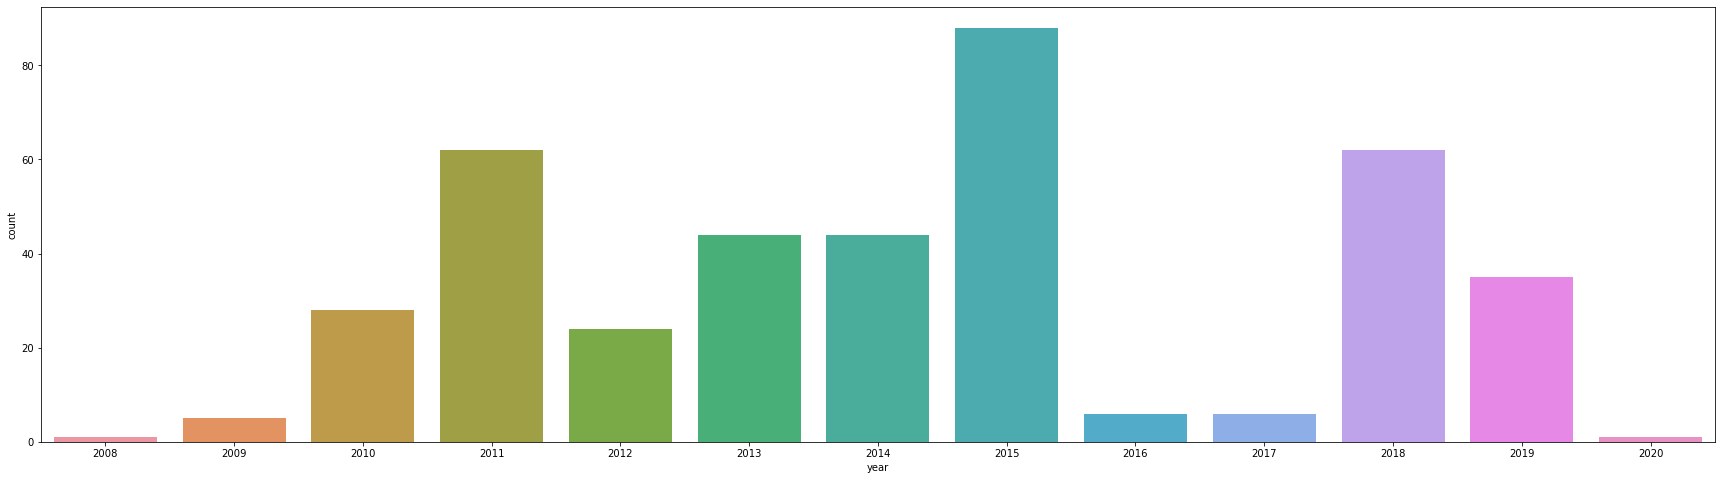

In [31]:
# count plot on single categorical variable

if filtered_df['year'].nunique() == 1:
    sns.countplot(x ='year', hue='month', data = filtered_df)
else:
    sns.countplot(x ='year', data = filtered_df)

plt.rcParams['figure.figsize']=30,8
# Show the plot
plt.show()

# Word cloud generator

In [39]:
pip install streamlit-wordcloud

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Hariharan\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.


  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


Nbr of news items: 21689


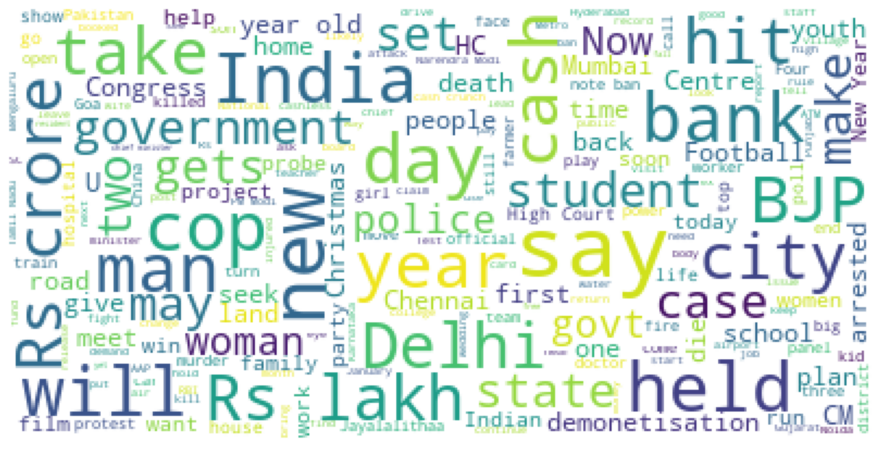

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_year = 2016
word_cloud_month = 12
word_cloud_day = 3

wc_df = df.loc[(df['year']==word_cloud_year) & (df['month']==word_cloud_month) & (df['day']==word_cloud_day)]
wc_df = df.loc[(df['year']==word_cloud_year) & (df['month']==word_cloud_month)]
# wc_df = df.loc[(df['year']==word_cloud_year)]


print("Nbr of news items:", wc_df.shape[0])
# Read the whole text.
text = ' '.join(wc_df['headline_text'].tolist())


# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# # the matplotlib way:


# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
list(range(2000,2021))

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]